# ICO projects from coinmarketcap - Huynh Duc Toan - coursera

An initial coin offering (ICO) is an event where a company sells a new cryptocurrency to raise money. Investors receive cryptocurrency in exchange for their financial contributions. In many ways, an ICO is the cryptocurrency version of an initial public offering (IPO) in the stock market.

There are milions of ICOs was created, only some project have enough credibility could show them off on coinmarketcap. Let's see how were their perfomances?

Data from [coinmarketcap](https://coinmarketcap.com/ico-calendar/ended/): 

Price data from coinmarketcap api, too

[Getting data process](https://github.com/tycoi2005/202308_machine_learning_ibm_coursera/blob/950d1af7d9682620ee2b8ae84c28a56c0f3c6900/003supervised-machine-learning-classification/w6.project.getcmc.ipynb) and [cleaning process]() could be view at my github


I'll build a model to explain what factor affect coin inactive (dead)

In [1]:
## Import packages here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import lime.lime_tabular

from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from sklearn.inspection import permutation_importance #, plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

Cleaned data  look like this:

In [2]:
df = pd.read_csv('./pj_data/cleaned_data.csv')
df = df.iloc[: , 1:]
df.head()

,icoPriceUsd,currentStage,goalUsd,total_supply,is_active,price,exchangeName,n_contracts,isbnb,tags_reduce,iseth,issol,ismatic,isada,isavax,lifeday,dayscreated
0,0.08,1,98000.0,1.000000e+08,1,0.005751,10,1.0,1,6,0,0,0,0,0,656,656
1,0.03,1,80000.0,1.000000e+17,0,0.000000,10,2.0,0,10,1,1,0,0,0,311,311
2,0.60,1,1500000.0,1.000000e+08,1,0.055907,10,1.0,0,10,0,0,0,0,0,138,138
3,0.00,0,300000000.0,1.000000e+17,1,0.011018,3,1.0,0,10,0,0,0,0,0,4,4
4,0.95,1,500000.0,1.000000e+17,0,0.000000,3,1.0,0,10,1,0,0,0,0,70,70


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
icoPriceUsd,1220.0,5.891680e+00,1.861119e+02,0.0,1.000000e-02,4.000000e-02,1.500000e-01,6.500000e+03
currentStage,1220.0,1.348361e+00,1.145289e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
goalUsd,1220.0,5.311083e+07,1.133864e+08,0.0,1.000000e+05,2.000000e+05,2.055000e+06,3.000000e+08
total_supply,1220.0,2.233385e+16,4.163714e+16,100000.0,1.200000e+08,1.000000e+09,6.428501e+10,1.000000e+17
is_active,1220.0,6.688525e-01,4.708190e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
price,1220.0,7.188388e+00,1.961358e+02,0.0,1.267517e-04,1.839954e-03,1.582388e-02,6.615486e+03
exchangeName,1220.0,8.909016e+00,2.816933e+00,0.0,1.000000e+01,1.000000e+01,1.000000e+01,1.300000e+01
n_contracts,1220.0,1.524590e+00,1.010309e+00,1.0,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
isbnb,1220.0,6.319672e-01,4.824681e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tags_reduce,1220.0,7.939344e+00,2.963479e+00,0.0,6.000000e+00,1.000000e+01,1.000000e+01,1.200000e+01


(array([404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 816.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

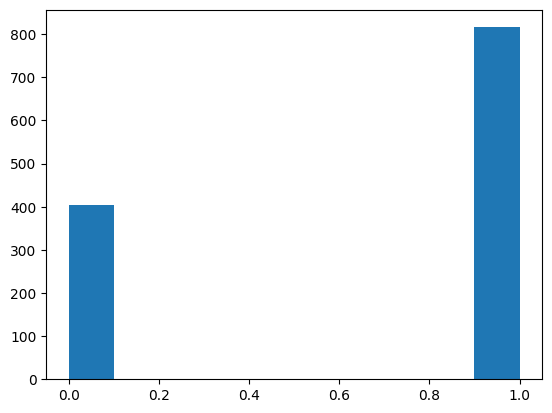

In [4]:
plt.hist(df.is_active)

44% ico coin was die

average lifedays is 600 days (~ 2 years)

(array([ 70., 104., 126., 388., 291., 205.,  18.,   4.,   7.,   7.]),
 array([   4. ,  172.8,  341.6,  510.4,  679.2,  848. , 1016.8, 1185.6,
        1354.4, 1523.2, 1692. ]),
 <BarContainer object of 10 artists>)

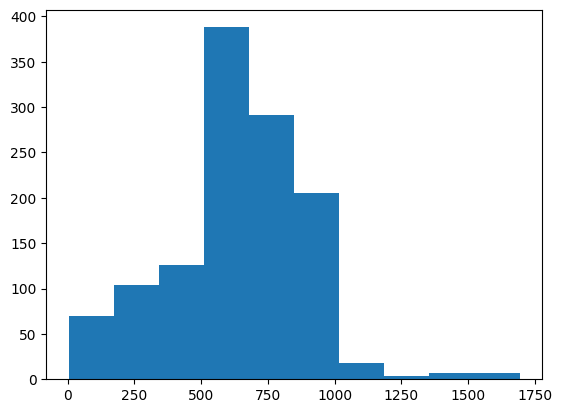

In [5]:
plt.hist(df.lifeday)

Let's check die coin only:

(array([ 59.,  67.,  84., 140.,  35.,  10.,   0.,   1.,   1.,   7.]),
 array([   6. ,  174.6,  343.2,  511.8,  680.4,  849. , 1017.6, 1186.2,
        1354.8, 1523.4, 1692. ]),
 <BarContainer object of 10 artists>)

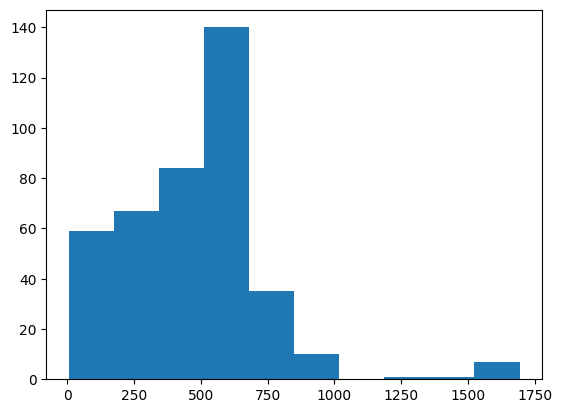

In [6]:
df_inactive = df[df['is_active']==0]
plt.hist(df_inactive.lifeday)

In [7]:
rs=42

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

# Extract and sort feature coefficients
def get_feature_coefs(regression_model):
    coef_dict = {}
    # Filter coefficients less than 0.01
    for coef, feat in zip(regression_model.coef_[0, :], X_test.columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=list(feature_names),  
                       filled=True)
    plt.show()

In [8]:
# Split the training and testing dataset
X = df.loc[ : , df.columns != 'is_active']
y = df['is_active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = rs)


In [9]:
# Build a simple logistic regression model
min_max_scaler = StandardScaler()
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_train_minmax = min_max_scaler.fit_transform(X_train)

model = LogisticRegression(random_state=rs, penalty='l1', solver='liblinear',
                              max_iter = 1000)
# Train the model
model.fit(X_train_minmax, y_train)
preds = model.predict(X_test_minmax)

evaluate_metrics(y_test, preds)

{'accuracy': 0.9262295081967213,
 'recall': 0.9346938775510204,
 'precision': 0.9541666666666667,
 'f1score': 0.9443298969072165}

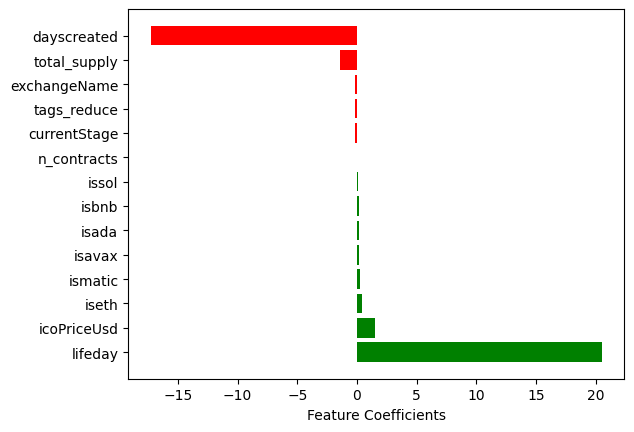

In [10]:
coef_dict = get_feature_coefs(model)
visualize_coefs(coef_dict)

LogisticRegression show that the blockchain framwork which the coin was ico is very important.


Try Decision Trees

In [11]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=rs)
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [12]:
best_params

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}

In [13]:
preds = grid_search.predict(X_test)

evaluate_metrics(y_test, preds)

{'accuracy': 0.9672131147540983,
 'recall': 0.9755102040816327,
 'precision': 0.9755102040816327,
 'f1score': 0.9755102040816327}

Let's read the model to understand important features:

In [14]:
tree_exp = export_text(grid_search.best_estimator_, feature_names=list(X_train.columns))
print(tree_exp)

|--- lifeday <= 624.50
|   |--- dayscreated <= 622.50
|   |   |--- price <= 0.00
|   |   |   |--- total_supply <= 71530111924436992.00
|   |   |   |   |--- lifeday <= 453.50
|   |   |   |   |   |--- dayscreated <= 229.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- dayscreated >  229.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- lifeday >  453.50
|   |   |   |   |   |--- price <= 0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- price >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- total_supply >  71530111924436992.00
|   |   |   |   |--- goalUsd <= 72000.00
|   |   |   |   |   |--- icoPriceUsd <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- icoPriceUsd >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- goalUsd >  72000.00
|   |   |   |   |   |--- class: 0
|   |   |--- price >  0.00
|   |   |   |--- lifeday <= 541.00
|   |   |   |   |--- dayscreated <= 529.00
|   |   |   |   |   |-

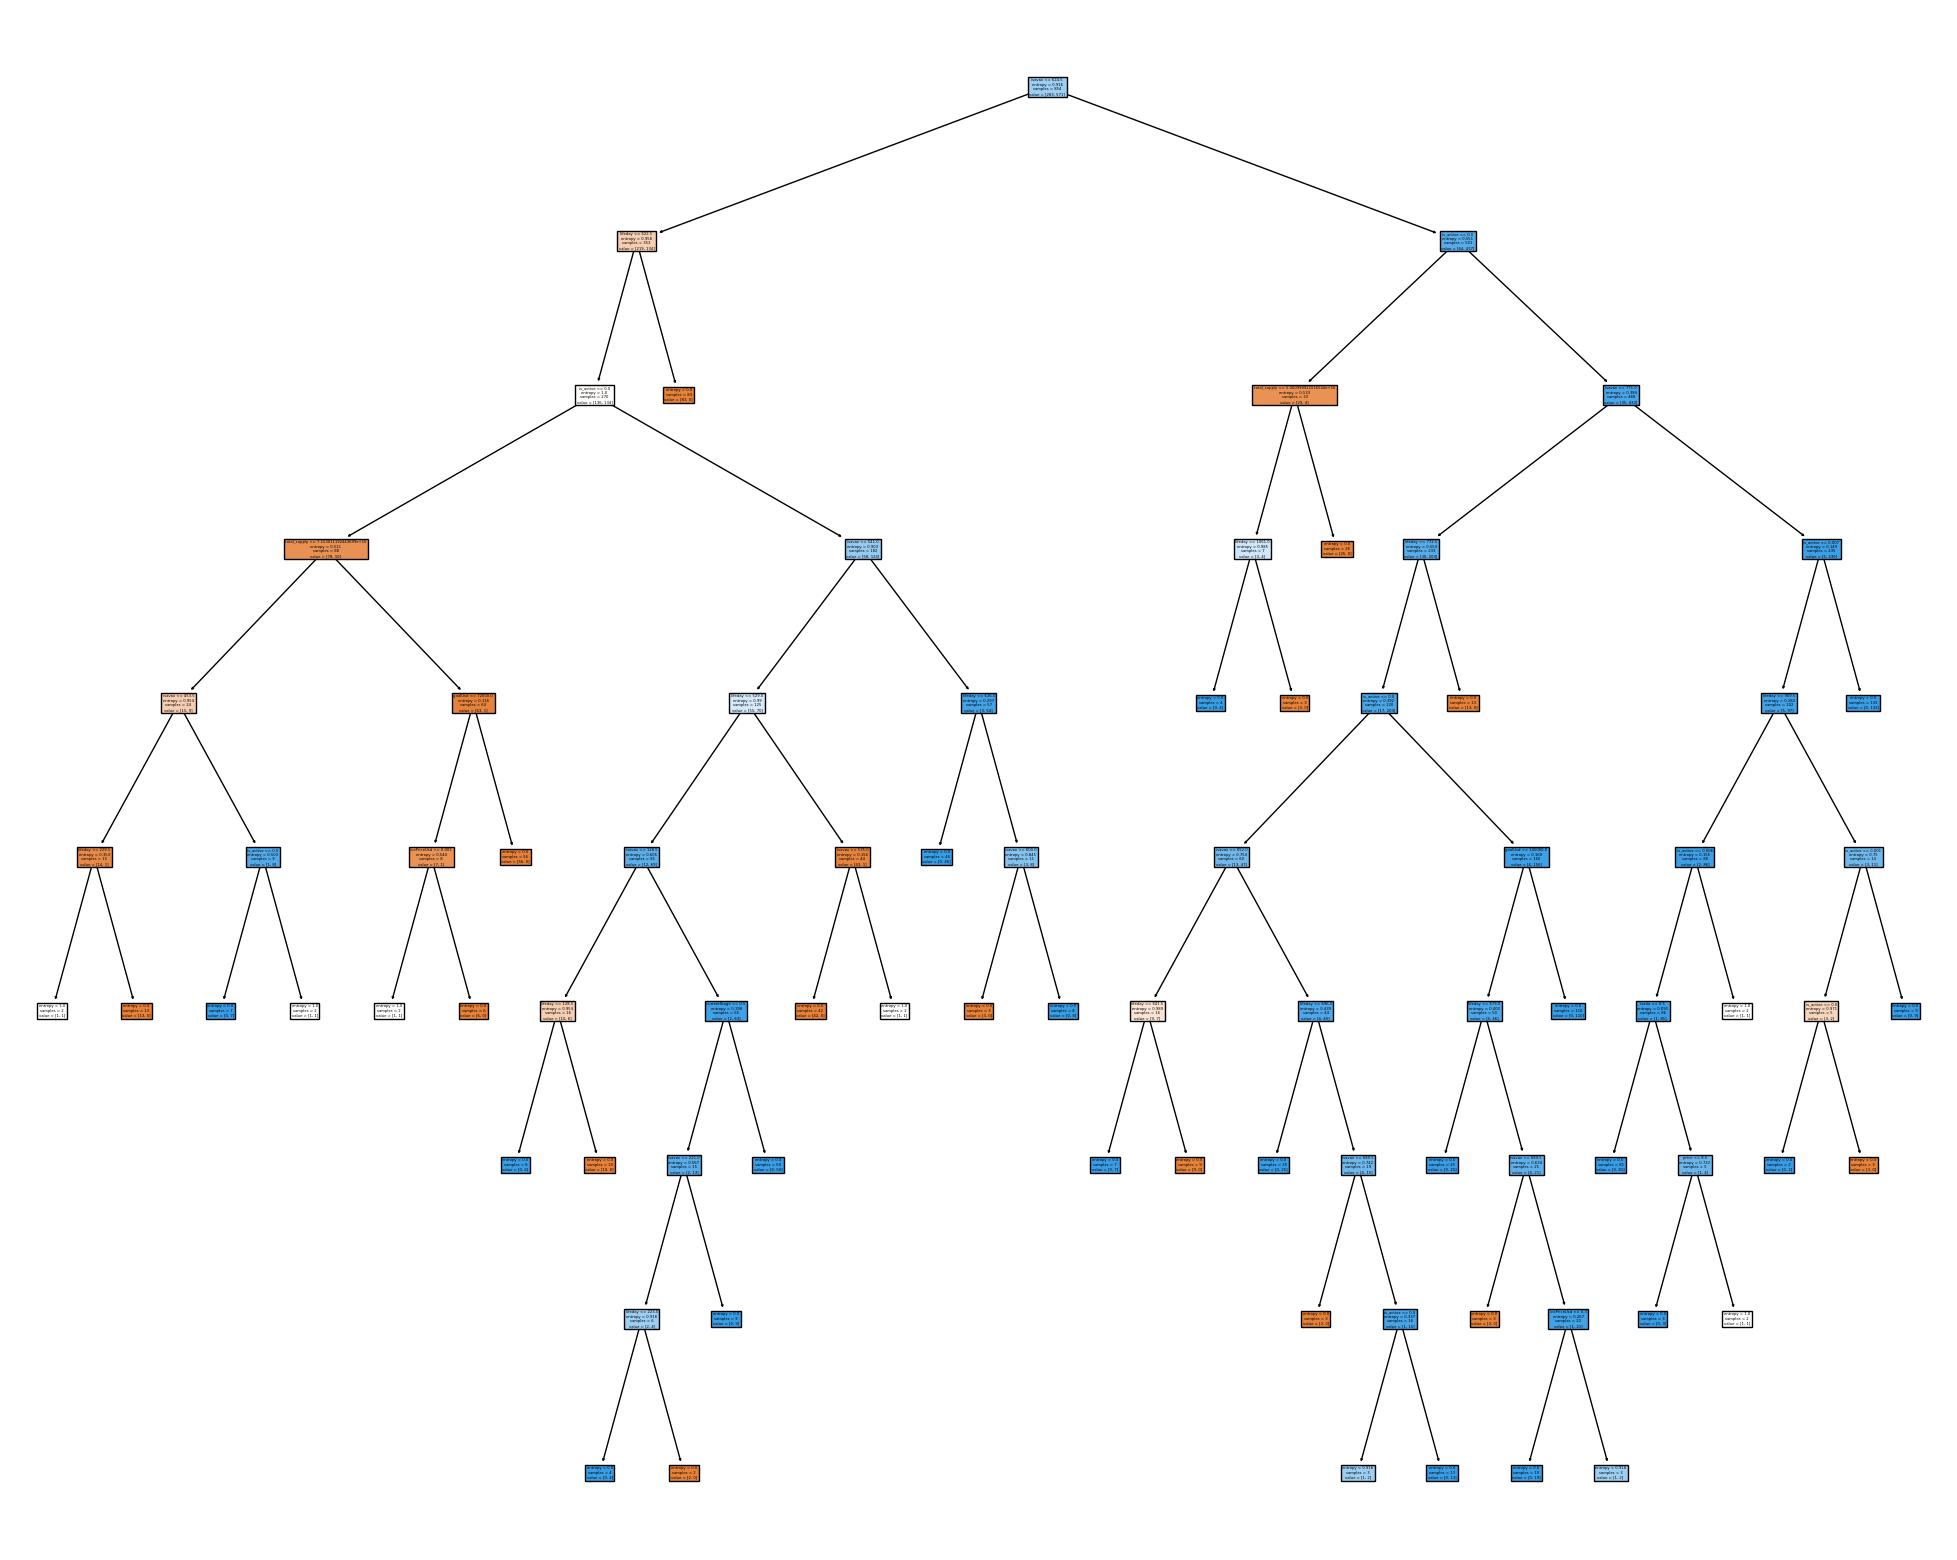

In [15]:
feature_names = df.columns.values
plot_decision_tree(grid_search.best_estimator_, feature_names=feature_names)

Try Support Vector Machine:

In [16]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}
model = SVC()

# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [17]:
preds = grid_search.predict(X_test)

evaluate_metrics(y_test, preds)

{'accuracy': 0.7349726775956285,
 'recall': 0.889795918367347,
 'precision': 0.7569444444444444,
 'f1score': 0.8180112570356473}

The best model was DecisionTree with hyperparameter {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1}

There are still something in the data need to be improved: The lifeday should be remove from leaning, and blockchain frameworks could be ratings and put in one feature. 

There are still many coin was nearly dead (-99% for example or no liquidity still on the list).

I'll comeback with a cleaner data and a better visual